In [1]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib/seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# display plots in the notebook itself
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="white")

#### Loading Data/Overview of data

In [2]:
df = pd.read_csv("nyc_taxi_trip_duration.csv")

In [3]:
df.shape, df.columns

((729322, 11), Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
        'passenger_count', 'pickup_longitude', 'pickup_latitude',
        'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
        'trip_duration'],
       dtype='object'))

In [4]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [6]:
#### converting datetime variable from object to datetime
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

In [7]:
df['total_time'] =(df['dropoff_datetime'] - df['pickup_datetime'])

In [8]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,total_time
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05,729322
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02,0 days 00:15:52.229133
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03,0 days 01:04:24.626197
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00,0 days 00:00:01
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02,0 days 00:06:37
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02,0 days 00:11:03
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03,0 days 00:17:55
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06,22 days 10:48:56


In [9]:
cat_var_names=[key for key in dict(df.dtypes) if dict(df.dtypes)[key] in ['object','datetime64[ns]']]

In [10]:
print(df[cat_var_names].count())

id                    729322
pickup_datetime       729322
dropoff_datetime      729322
store_and_fwd_flag    729322
dtype: int64


In [11]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

###obeservation of numerical data
-No null value as count is same as dataframe count
-trip duration(1939736s) & total_time shows some outlier(22 days for total time)

###observation of non numerical data
no null data found in non numeric data

## Univariate Analysis
Lets have a look at the distribution of various variables in the Data set.

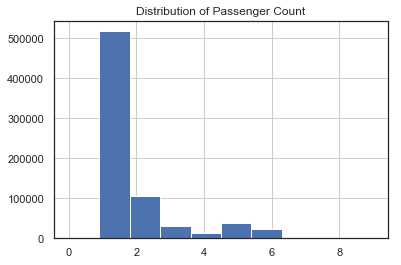

In [12]:
df['passenger_count'].hist()
plt.title('Distribution of Passenger Count')
plt.show()

Text(0.5, 1.0, 'The distribution of of the Pick Up  Duration distribution')

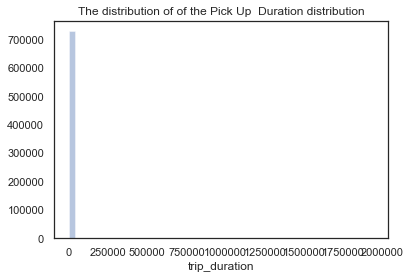

In [13]:
sns.distplot(df['trip_duration'],kde=False)
plt.title('The distribution of of the Pick Up  Duration distribution')

Text(0.5, 1.0, 'A boxplot depicting the pickup duration distribution')

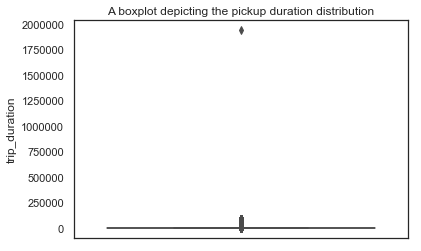

In [14]:
sns.boxplot(df['trip_duration'], orient='vertical')
plt.title('A boxplot depicting the pickup duration distribution')

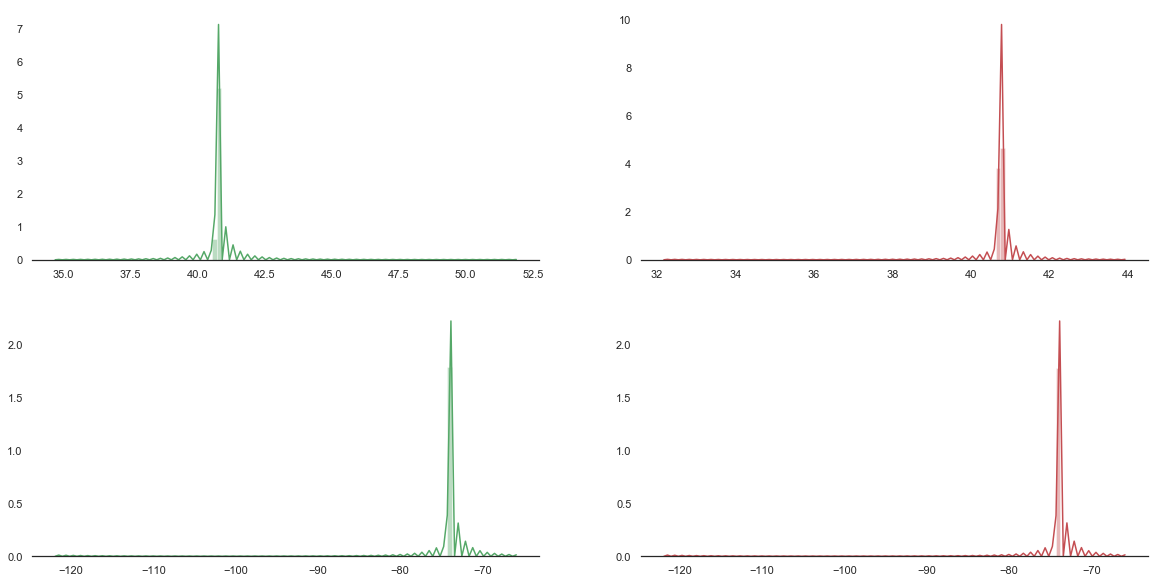

In [29]:
### Plot a univariate distribution of observations for latitude and longitude values to get a sense of where the most of the rides
# are concentrated in terms of location.
fig, ax = plt.subplots(2,2,figsize=(20, 10), sharex=False, sharey = False)
sns.despine(left=True)
sns.distplot(df['pickup_latitude'].values, label = 'pickup_latitude',color="g",bins = 100, ax=ax[0,0])
sns.distplot(df['dropoff_latitude'].values, label = 'dropoff_latitude',color="r",bins = 100, ax=ax[0,1])
sns.distplot(df['pickup_longitude'].values, label = 'pickup_longitude',color="g",bins = 100, ax=ax[1,0])
sns.distplot(df['dropoff_longitude'].values, label = 'dropoff_longitude',color="r",bins = 100, ax=ax[1,1])

##### The above plots shows us that most of the rides are centered around the following coordinates:
Latitude: 37.5 to 44
Longitude: -80 to -70

In [19]:
df['pickup_datetime'].nunique(),df['dropoff_datetime'].nunique()

(709359, 709308)

In [20]:
###Pickup day density
df['pickup_dayofweek']=df['pickup_datetime'].dt.day_name()
df['dropoff_dayofweek']=df['dropoff_datetime'].dt.day_name()

In [21]:
###pickup and drop hours distribution
df['pickup_hour']=df['pickup_datetime'].dt.hour
df['dropoff_hour']=df['dropoff_datetime'].dt.hour

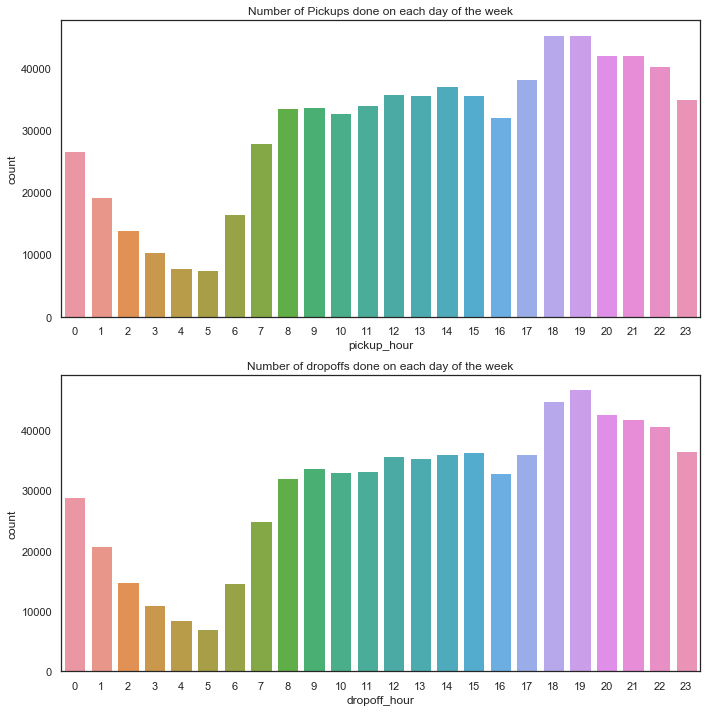

In [22]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_hour',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_hour',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

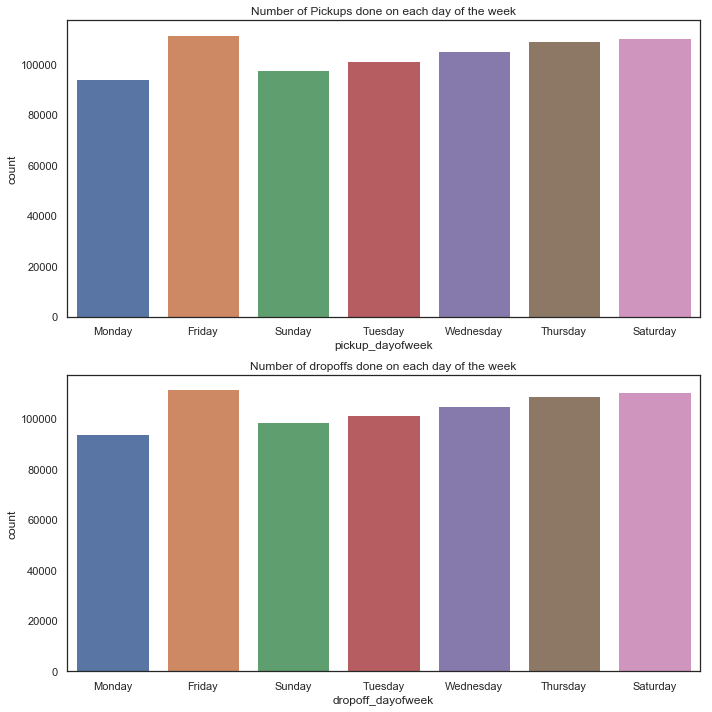

In [23]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_dayofweek',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_dayofweek',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

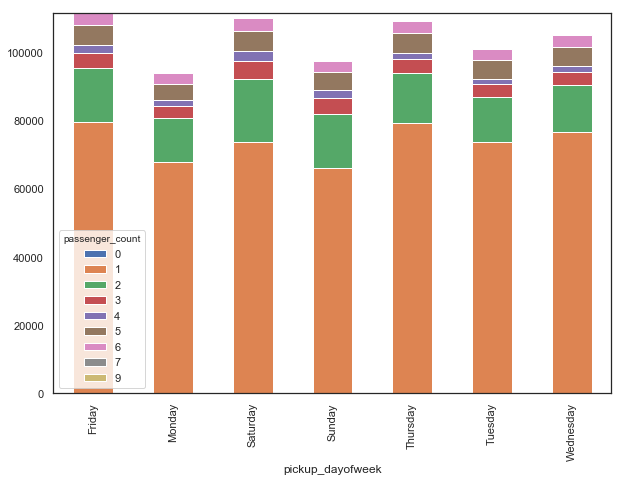

In [24]:
df.groupby(['pickup_dayofweek','passenger_count']).size().unstack().plot(kind='bar',stacked=True, figsize=(10,7))
plt.show()

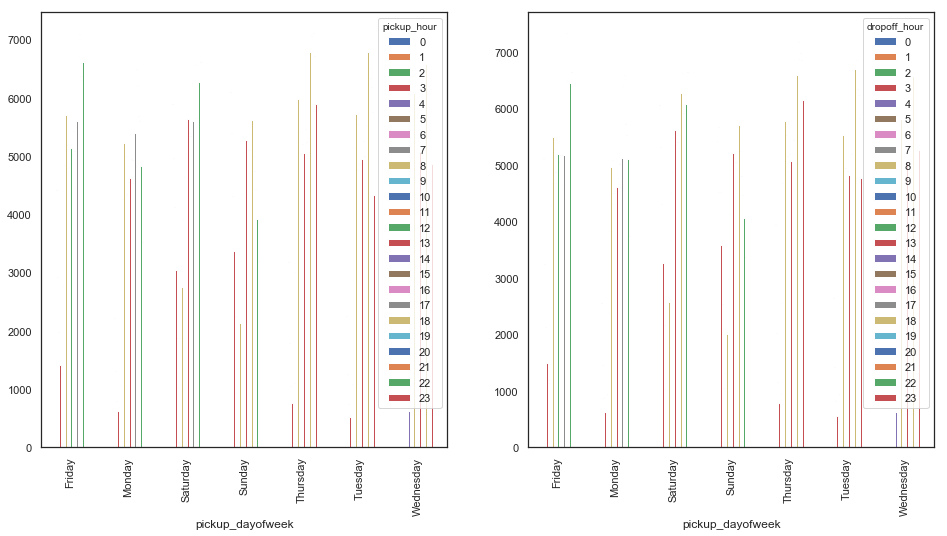

In [26]:
df_1 = df.groupby(["pickup_dayofweek","pickup_hour"]).size().reset_index(name='Count')
df_2 = df.groupby(["pickup_dayofweek","dropoff_hour"]).size().reset_index(name='Count')

df3 = pd.pivot_table(df_1,  values='Count',  columns=['pickup_hour'],  index = "pickup_dayofweek",
                         aggfunc=np.sum,  fill_value=0)
df4 = pd.pivot_table(df_2,  values='Count',  columns=['dropoff_hour'],  index = "pickup_dayofweek",
                         aggfunc=np.sum,  fill_value=0)


fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16,8))
df3.plot(kind='bar', ax=ax1)
df4.plot(kind='bar', ax=ax2)


fig.show()

#### Bivariate Analysis

###Hourly rides by per day of week

In [37]:
hourly_counts = df.set_index('pickup_datetime').resample('1h').size().reset_index(name='pickups')
hourly_counts['date'] = hourly_counts.pickup_datetime.dt.strftime("%b %d %Y")
hourly_counts['hour'] = hourly_counts.pickup_datetime.dt.hour
hourly_counts['DoW'] = hourly_counts.pickup_datetime.dt.dayofweek

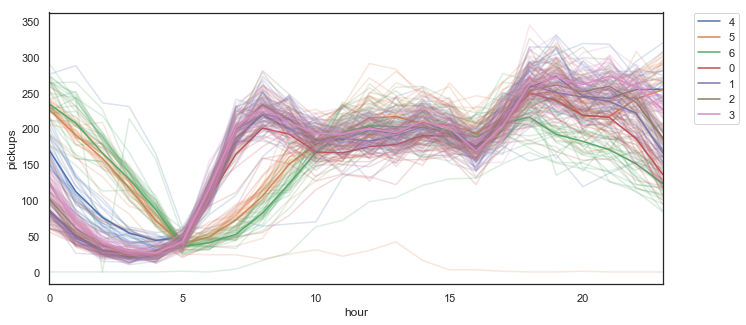

In [38]:
plt.figure(figsize=(11, 5))
sns.tsplot(time="hour", value="pickups", unit="date", condition='DoW', data=hourly_counts, err_style="unit_traces", )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

In [39]:
# Pickup and dropoff hour of day:
df['pickup_hour'] = df.pickup_datetime.dt.hour
df['dropoff_hour'] = df.dropoff_datetime.dt.hour

# Pickup and dropoff day of week:
df['pickup_DoW'] = df.pickup_datetime.dt.dayofweek
df['dropoff_DoW'] = df.dropoff_datetime.dt.dayofweek

In [40]:
# Log trip duration
df['log_duration'] = np.log(1 + df.trip_duration)


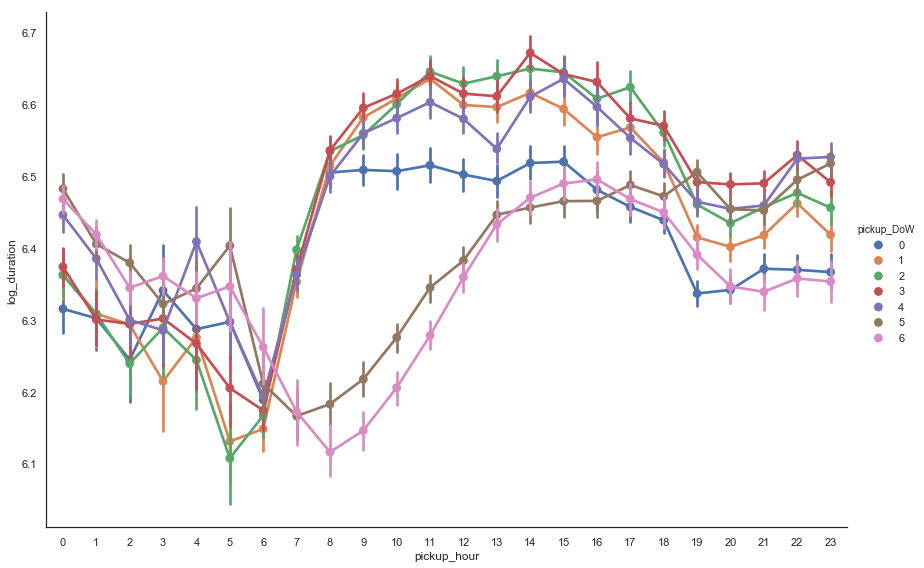

In [42]:
####Pickup hour of day vs log trip duration
grid = sns.factorplot(x="pickup_hour", y="log_duration",  hue="pickup_DoW", data=df, aspect=1.5, size=8);

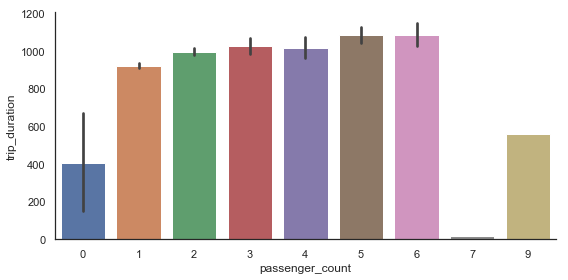

In [44]:
#Passager count versus average trip duration

grid = sns.factorplot(x="passenger_count", y="trip_duration", data=df, aspect=2, size=4, kind='bar');